In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns

In [10]:
df = pd.read_csv('FINAL_DATA.csv')

In [35]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['year'] = df['start_date'].dt.year

In [9]:
df = pd.read_csv('all_data_4.csv')

C:\Users\marii\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head()

,Unnamed: 0,duration,usertype,city,start_date,average_city_speed(mph),speed_min_mile,distance_traveled,paleo_commuter,vegan_commuter,regular_commuter,car_emission
0,0,6,Subscriber,Boston,1/1/2019,12,5,1.2,168.0,49.8,87.0,484.8
1,1,6,Subscriber,Boston,1/1/2019,12,5,1.2,168.0,49.8,87.0,484.8
2,2,5,Subscriber,Boston,1/1/2019,12,5,1.0,140.0,41.5,72.5,404.0
3,3,39,Customer,Boston,1/1/2019,12,5,7.8,1092.0,323.7,565.5,3151.2
4,4,33,Subscriber,Boston,1/1/2019,12,5,6.6,924.0,273.9,478.5,2666.4


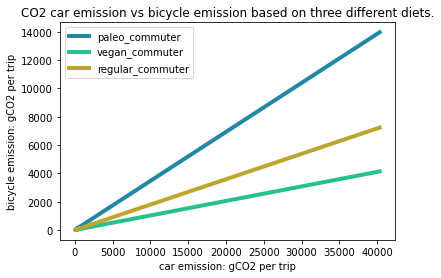

In [26]:
df.plot(x = 'car_emission', y = ['paleo_commuter', 'vegan_commuter', 'regular_commuter'], color = ['#2187A5', '#27C18D', '#BFA52E'], linewidth = 4)
plt.title('CO2 car emission vs bicycle emission based on three different diets.')
plt.xlabel('car emission: gCO2 per trip')
plt.ylabel('bicycle emission: gCO2 per trip')

plt.show()

In [32]:
print('paleo:',df['paleo_commuter'].mean())
print('car:',df['car_emission'].mean())
print('vegan:',df['vegan_commuter'].mean())
print('regular:',df['regular_commuter'].mean())

paleo: 723.5921015893928
car: 2088.0800645846675
vegan: 214.49337297119692
regular: 374.7173383230784


In [33]:
%matplotlib inline

In [36]:
x = df.groupby(['city', 'usertype', 'year']).size().to_frame('count').reset_index()

In [37]:
x

,city,usertype,year,count
0,Austin,Customer,2019,39287
1,Austin,Customer,2020,43539
2,Austin,Customer,2021,71314
3,Austin,Subscriber,2019,39160
4,Austin,Subscriber,2020,43203
5,Austin,Subscriber,2021,100737
6,Boston,Customer,2019,21737
7,Boston,Customer,2020,30696
8,Boston,Customer,2021,30786
9,Boston,Subscriber,2019,98034


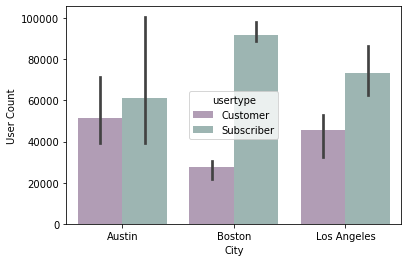

In [46]:
my_pal = {'Customer':'#B399B9', 'Subscriber':'#99B9B5'}
ax = sns.barplot(x='city', y = 'count', hue = 'usertype', data = x, palette = my_pal)
ax.set(xlabel='City', ylabel='User Count')
plt.show()

In [31]:
x1 = df.groupby(['city', 'usertype']).size().to_frame('count').reset_index()

In [ ]:
df['usertype'].mean()

<AxesSubplot:xlabel='usertype', ylabel='count'>

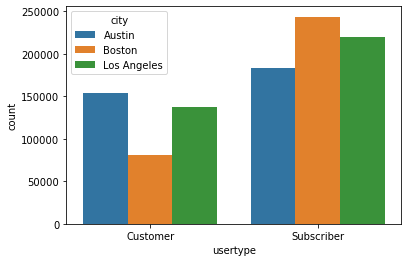

In [32]:
sns.barplot(x='usertype', y = 'count', hue = 'city', data = x1)

In [37]:
x2 = df.groupby(['year', 'usertype']).size().to_frame('count').reset_index()

In [34]:
x2

,year,usertype,count
0,2019,Customer,112183
1,2019,Subscriber,211287
2,2020,Customer,106161
3,2020,Subscriber,193945
4,2021,Customer,154420
5,2021,Subscriber,241708


In [ ]:
my_pal = {'2019':'#B399B9', '2020':'#99B9B5', '2021':'#D187C5'}
ax = sns.barplot(x='usertype', y = 'count', hue = 'year', data = x2, palette = my_pal)
ax.set(xlabel='City', ylabel='User Count')
plt.show()

<AxesSubplot:xlabel='start_date'>

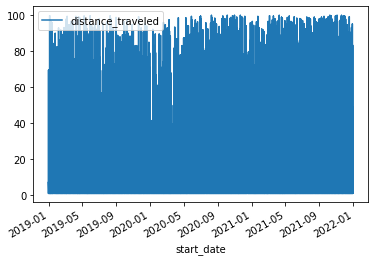

In [58]:
df.plot(x='start_date', y ='distance_traveled')

In [75]:
df.dtypes

Unnamed: 0                          int64
duration                            int64
usertype                           object
city                               object
start_date                 datetime64[ns]
average_city_speed(mph)             int64
speed_min_mile                      int64
distance_traveled                 float64
paleo_commuter                    float64
vegan_commuter                    float64
regular_commuter                  float64
car_emission                      float64
year                                int64
dtype: object

TypeError: unhashable type: 'numpy.ndarray'

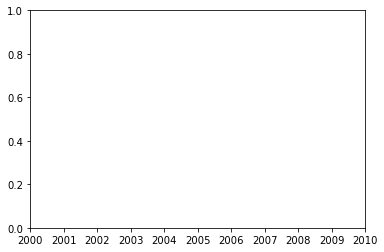

In [79]:
DF = pd.DataFrame()
date_time = pd.to_datetime(df['start_date'])
DF['value']  = df['usertype']
DF = DF.set_index(date_time)
plt.plot(DF)
plt.gcf().autofmt_xdate()


In [74]:
df.plot(x = 'year', y= 'usertype', kind ='line')

TypeError: no numeric data to plot